# Subclustering DC populations to see how they break up

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
# read in data
data_DC = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [4]:
data_DC

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

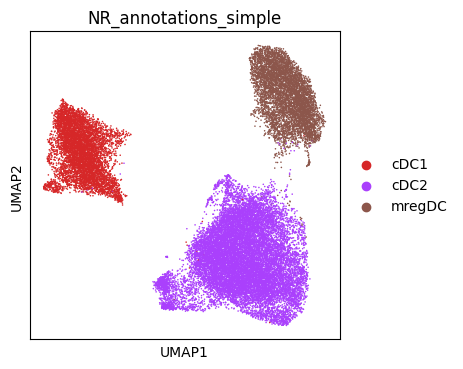

In [7]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC, color="NR_annotations_simple", size=5)

In [13]:
# re-cluster DC 
sc.tl.leiden(data_DC, resolution=0.2, key_added='2025-DC-subcluster_02')
sc.tl.leiden(data_DC, resolution=0.5, key_added='2025-DC-subcluster_05')
sc.tl.leiden(data_DC, resolution=0.8, key_added='2025-DC-subcluster_08')
sc.tl.leiden(data_DC, resolution=1, key_added='2025-DC-subcluster_10')

In [14]:
colour_vars = ['2025-DC-subcluster_02', '2025-DC-subcluster_05', '2025-DC-subcluster_08', '2025-DC-subcluster_10']

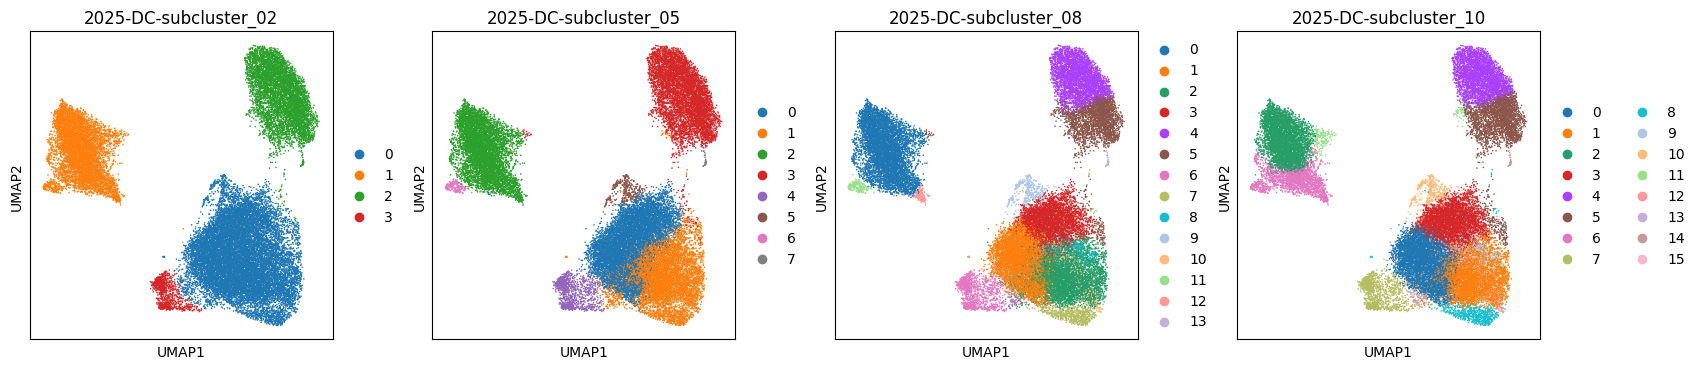

In [15]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols = 4, size=5)

In [3]:
#define function
def cluster_small_multiples(
    data_int, clust_key, size=5, frameon=False, legend_loc=None, **kwargs
):
    tmp = data_int.copy()

    for i, clust in enumerate(data_int.obs[clust_key].cat.categories):
        tmp.obs[clust] = data_int.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", data_int.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=data_int.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs
    )

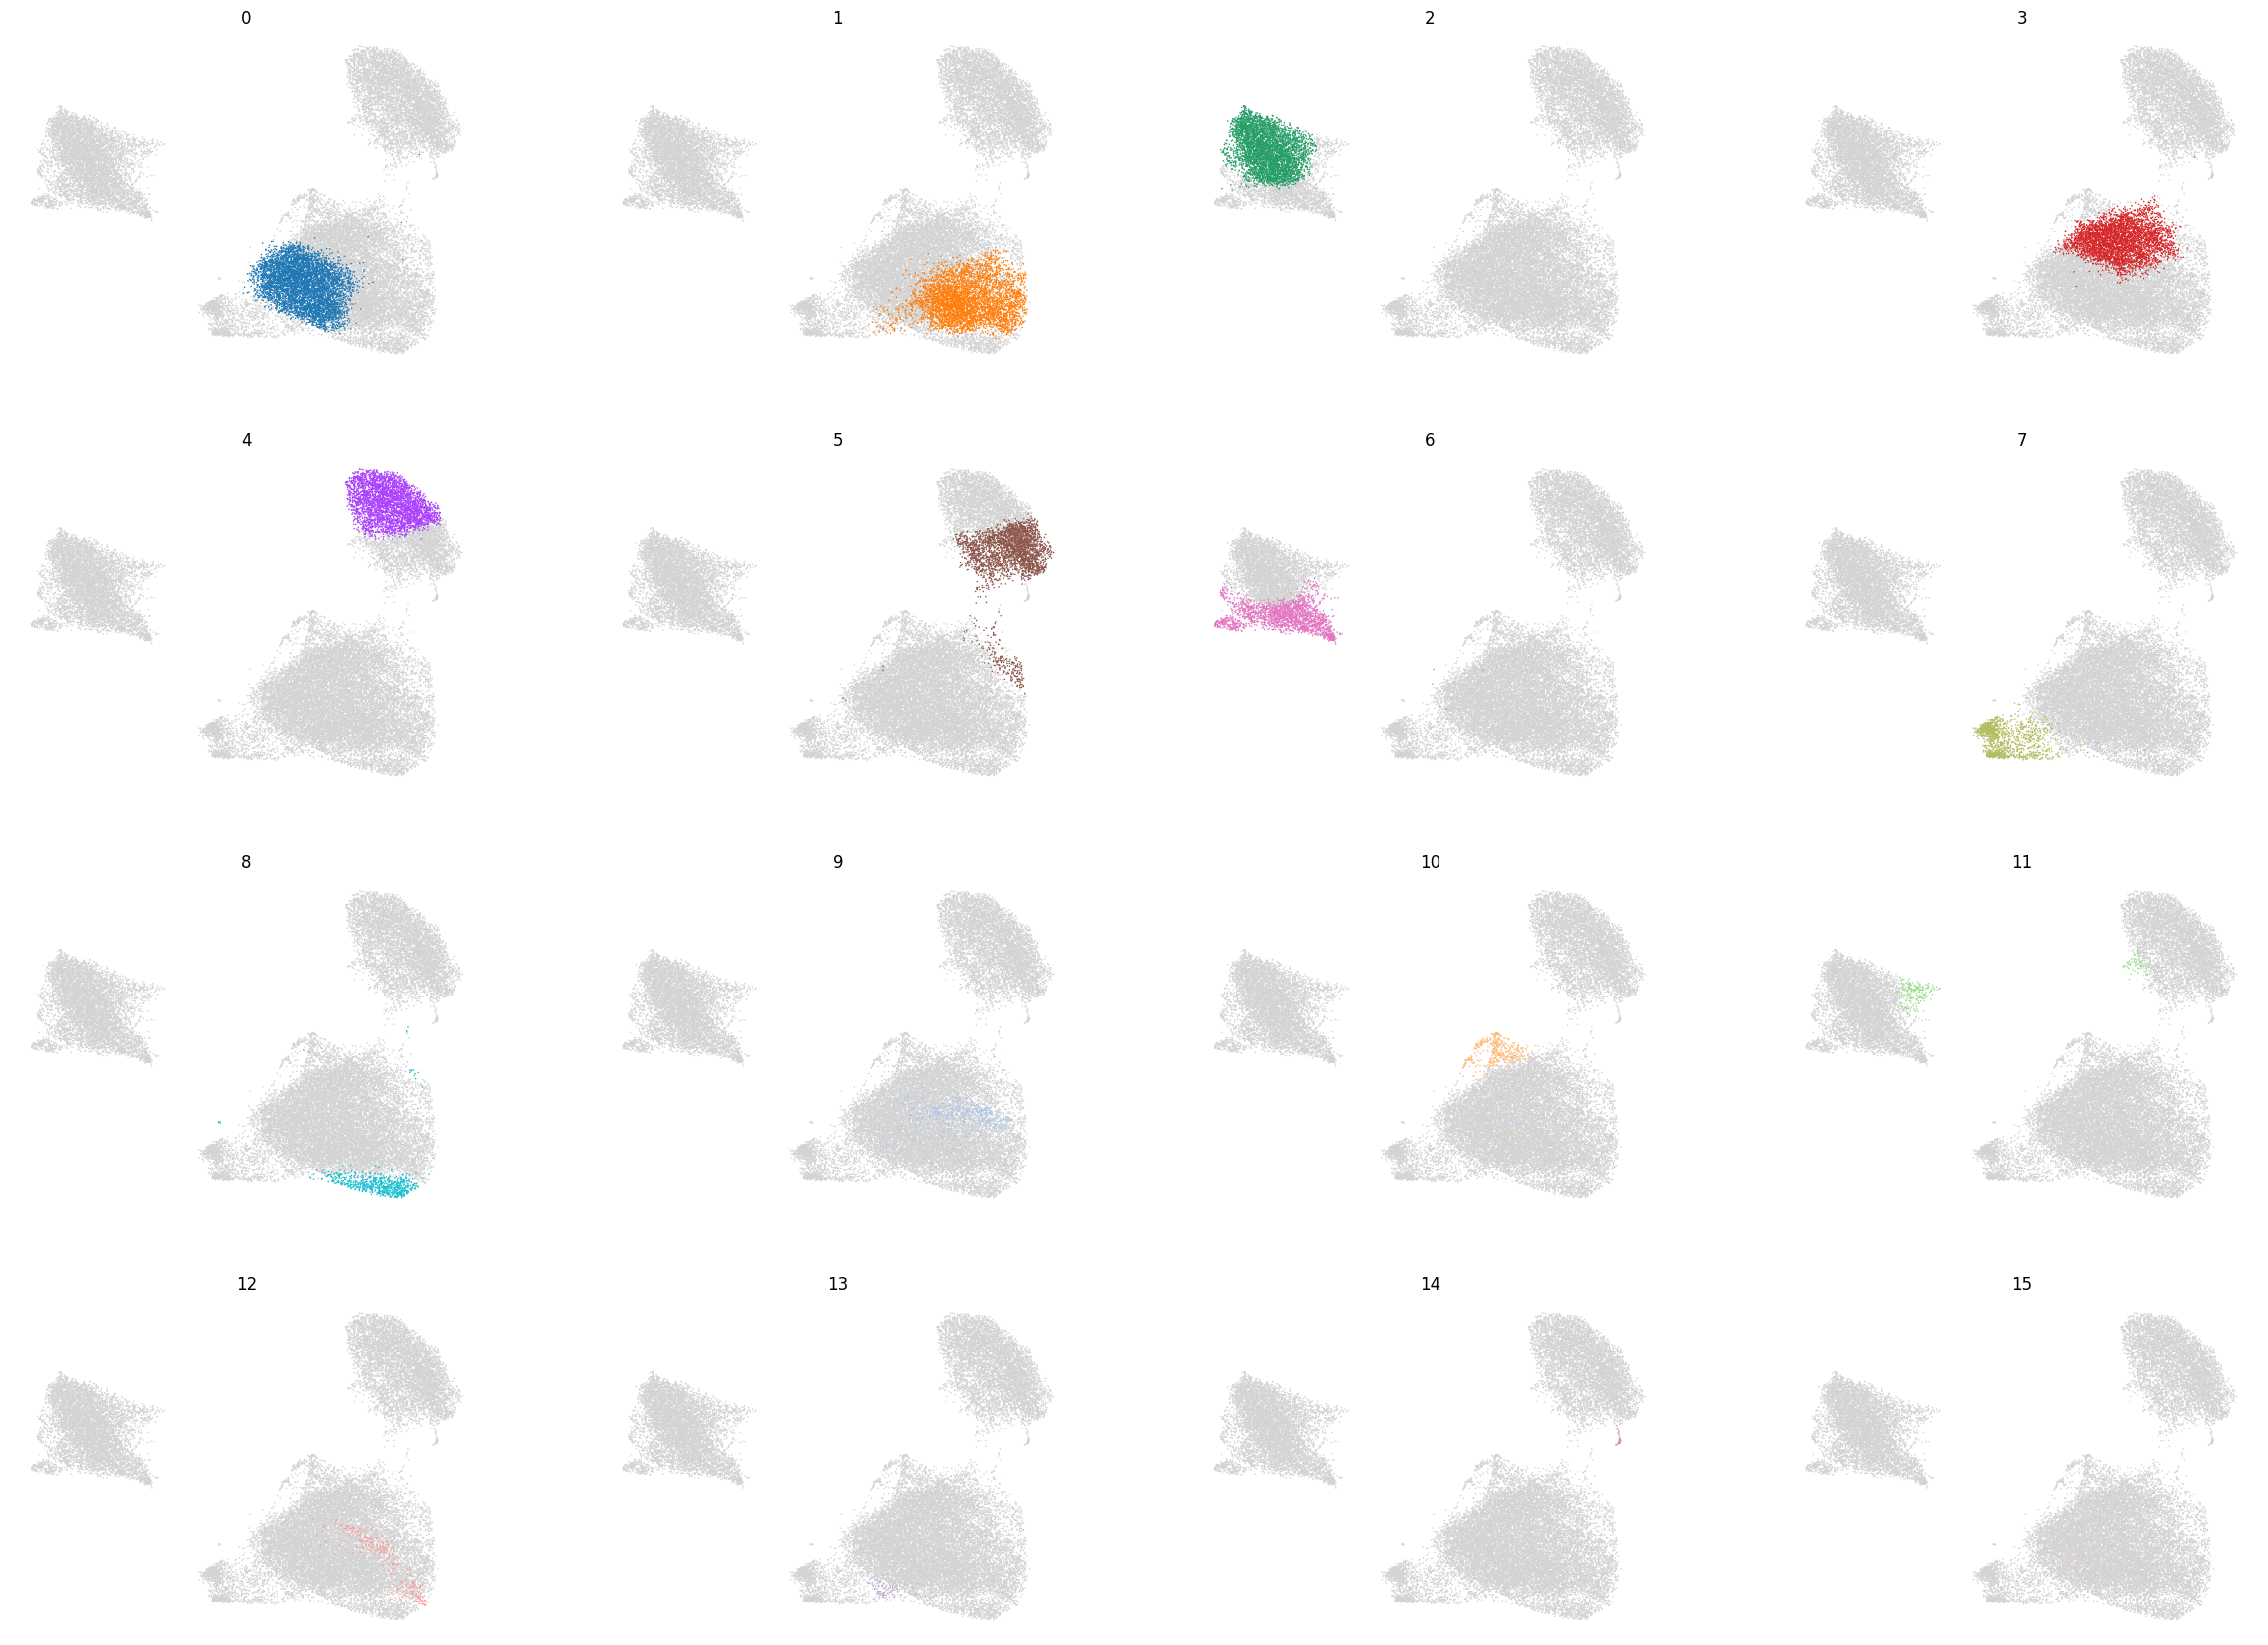

In [20]:
cluster_small_multiples(data_DC, "2025-DC-subcluster_10")

In [21]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data_DC, groupby="2025-DC-subcluster_10", method="wilcoxon")

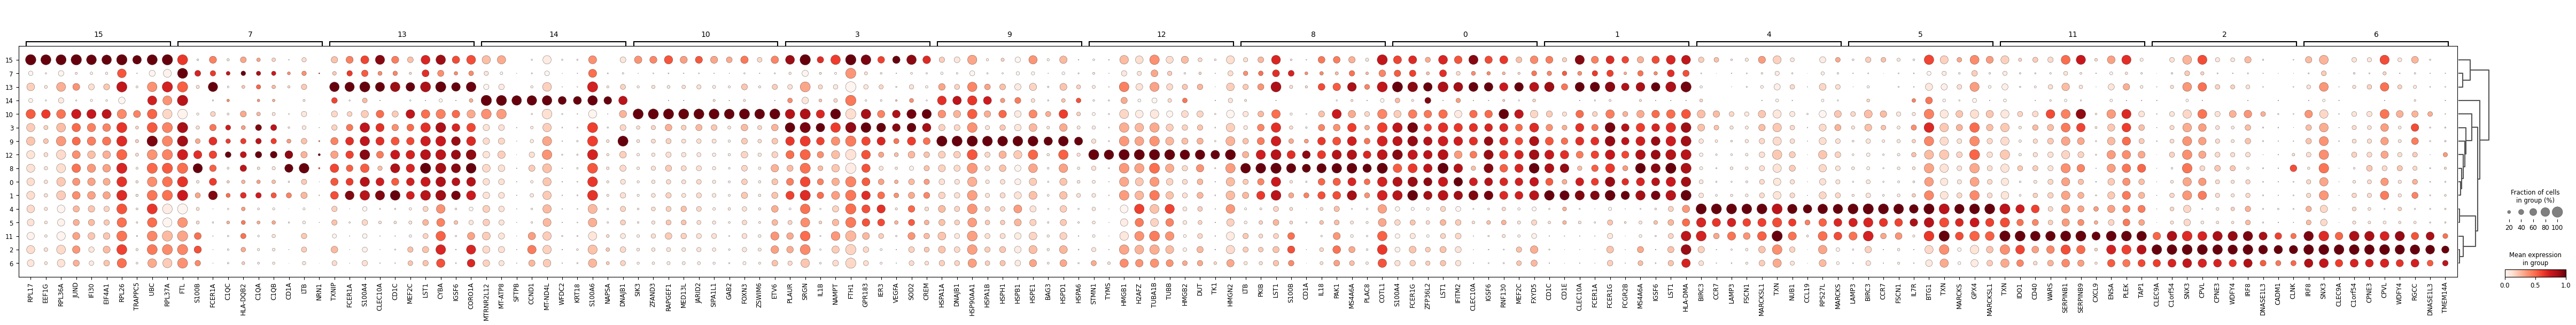

In [22]:
#visualise the top 10 DEG genes for each cluster
sc.pl.rank_genes_groups_dotplot(
    data_DC, groupby="2025-DC-subcluster_10", standard_scale="var", n_genes=10, min_logfoldchange=1
)

In [23]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data_DC, groupby="2025-DC-subcluster_02", method="wilcoxon")

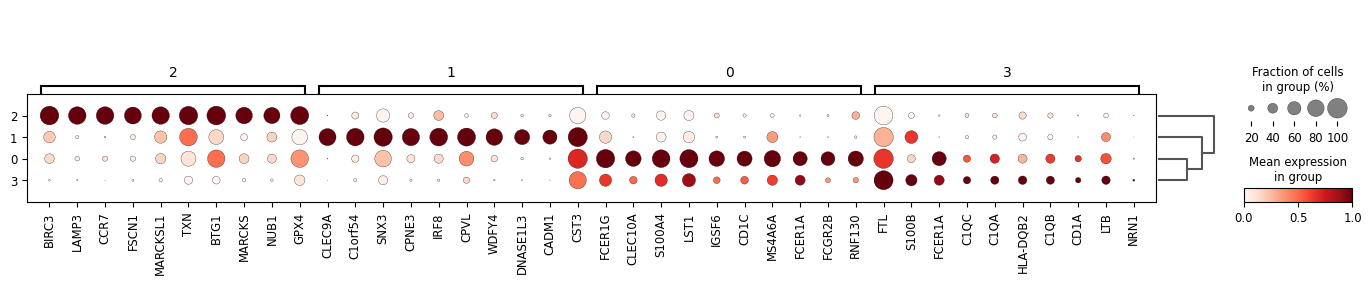

In [24]:
#visualise the top 10 DEG genes for each cluster
sc.pl.rank_genes_groups_dotplot(
    data_DC, groupby="2025-DC-subcluster_02", standard_scale="var", n_genes=10, min_logfoldchange=1
)

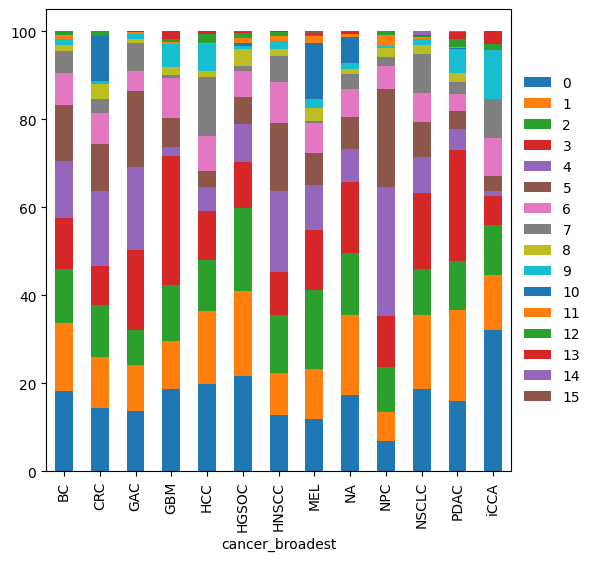

In [29]:
pd.crosstab(data_DC.obs["cancer_broadest"], data_DC.obs["2025-DC-subcluster_10"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

In [10]:
fig_genes = {
    "cDC1": ["CLEC9A", "XCR1","BATF3","IRF8"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A"],
    "mregDC": ["LAMP3","CD274","CCR7"],
    "Mono": ["LYZ","S100A8","S100A9","CD14","FCGR3A"],
    "Mac": ["FCGR1A","CD68","CSF1R","TREM2","SPP1"],
    "Tissue Res.": ["C1QA","C1QB","C1QC"],
    "Prolif.": ["MKI67"]
}

In [ ]:
#cat_order = ["cDC1","cDC2","mregDC","Classical monocytes","non-classical monocytes","Tissue resident macrophage","KI-67+ Tissue resident macrophage"]
#sc.pl.dotplot(data, fig_genes, groupby="NR_annotations_simple", standard_scale="var", categories_order=cat_order)

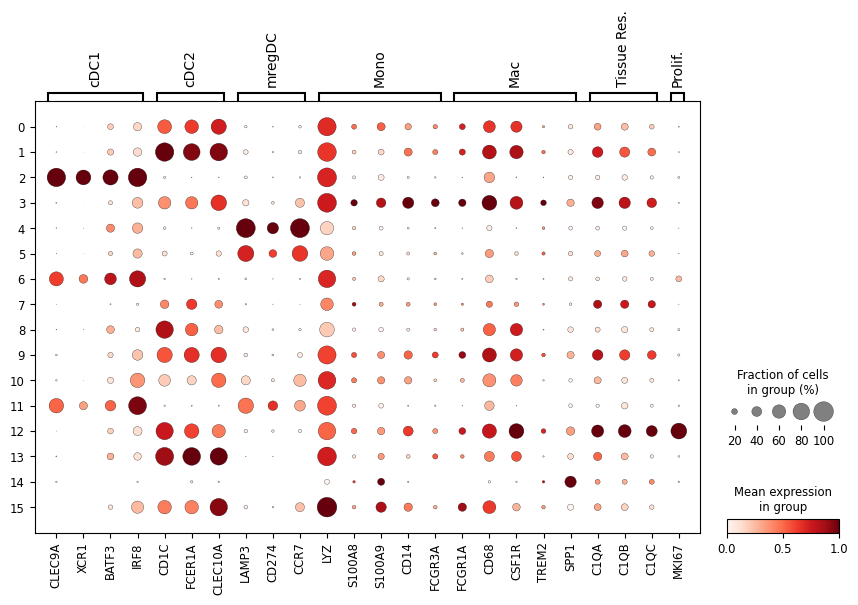

In [32]:
sc.pl.dotplot(data_DC, fig_genes, groupby="2025-DC-subcluster_10", standard_scale="var")

# Repeating but within the context of the full atlas so can compare to other myeloid cells

In [4]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [5]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

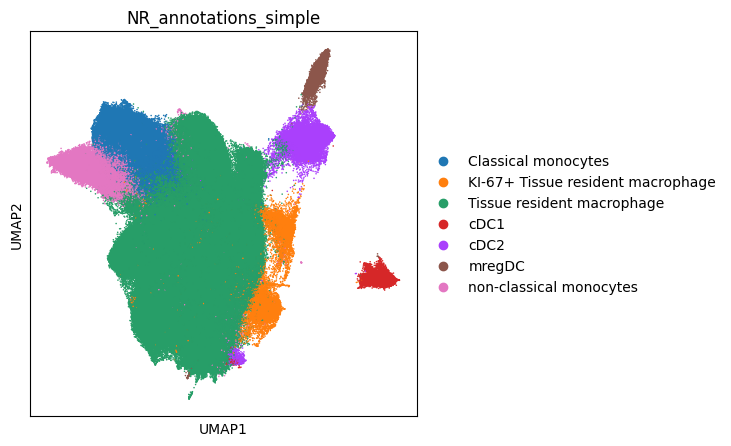

In [6]:
#plotting clusters
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="NR_annotations_simple", size=5)

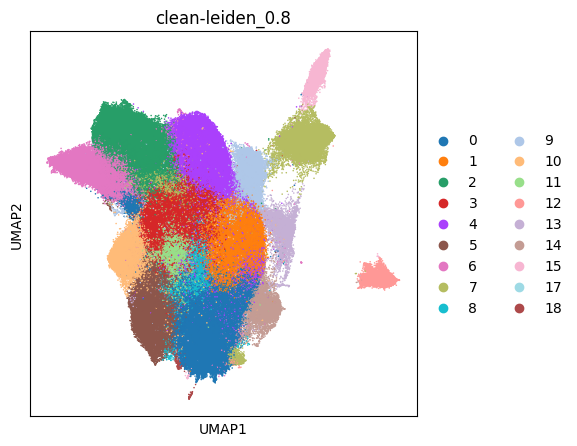

In [40]:
#plotting clusters
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="clean-leiden_0.8", size=5)

In [41]:
#subcluster cluster 7
sc.tl.leiden(data, restrict_to=('clean-leiden_0.8', ['7']), resolution=0.8, key_added="2025_DC2_subcluster")

In [7]:
#subcluster cDC2
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.5, key_added="2025_DC2_subcluster_2")

/scratch/temp/13870517/ipykernel_1133352/2313856225.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.5, key_added="2025_DC2_subcluster_2")


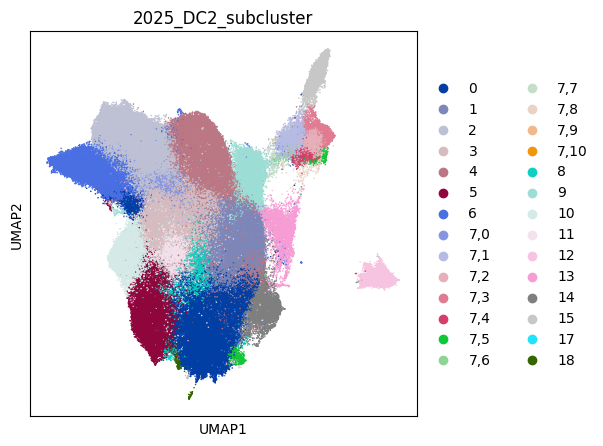

In [42]:
#plotting clusters
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="2025_DC2_subcluster", size=5)

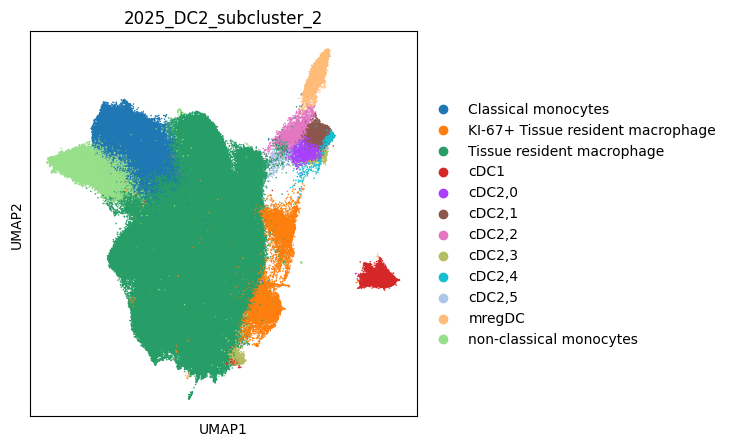

In [8]:
#plotting clusters
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="2025_DC2_subcluster_2", size=5)

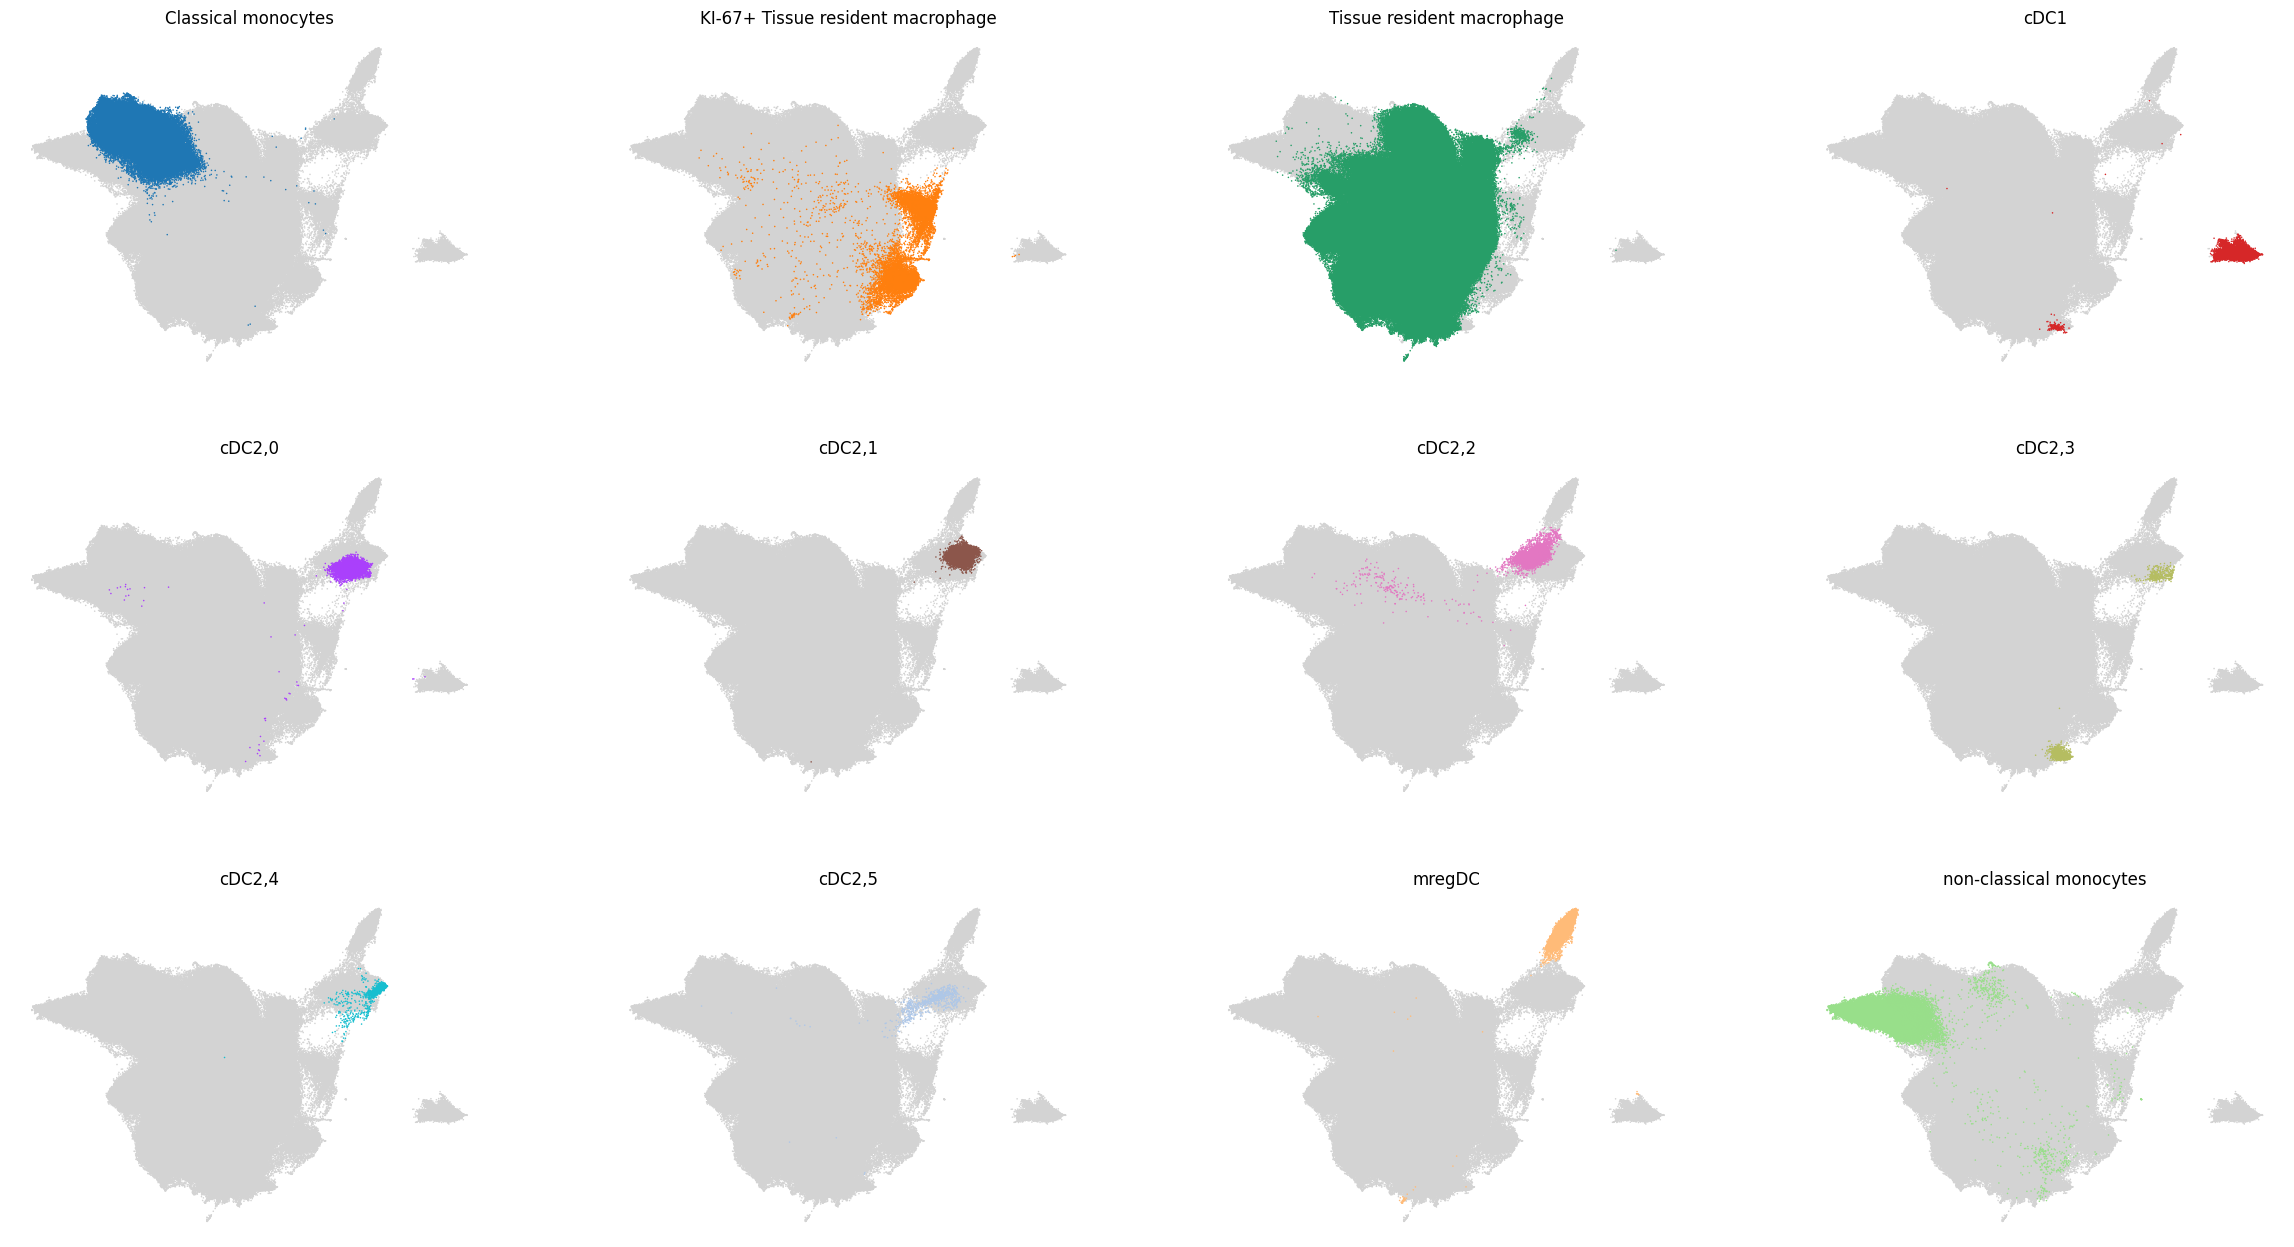

In [9]:
cluster_small_multiples(data, "2025_DC2_subcluster_2")

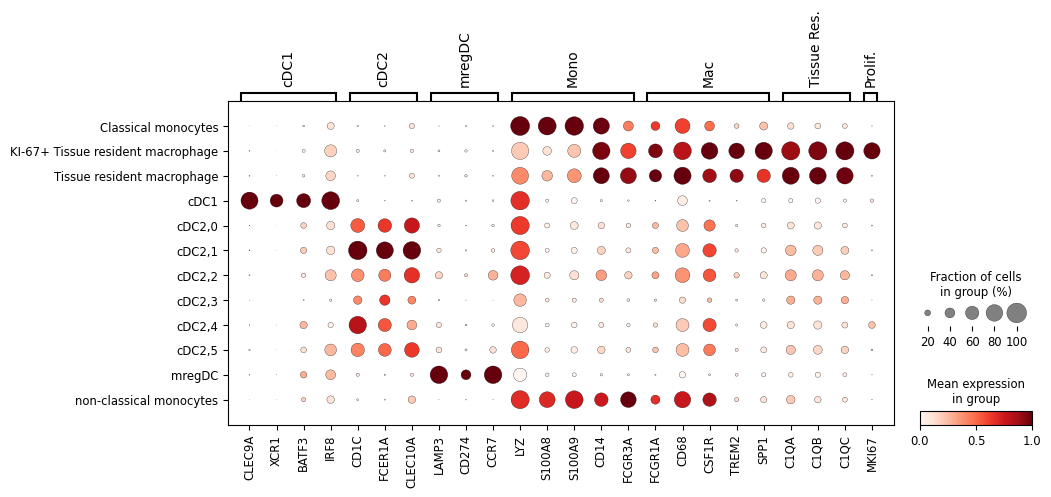

In [11]:
sc.pl.dotplot(data, fig_genes, groupby="2025_DC2_subcluster_2", standard_scale="var")

In [12]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data, groupby="2025_DC2_subcluster_2", method="wilcoxon")

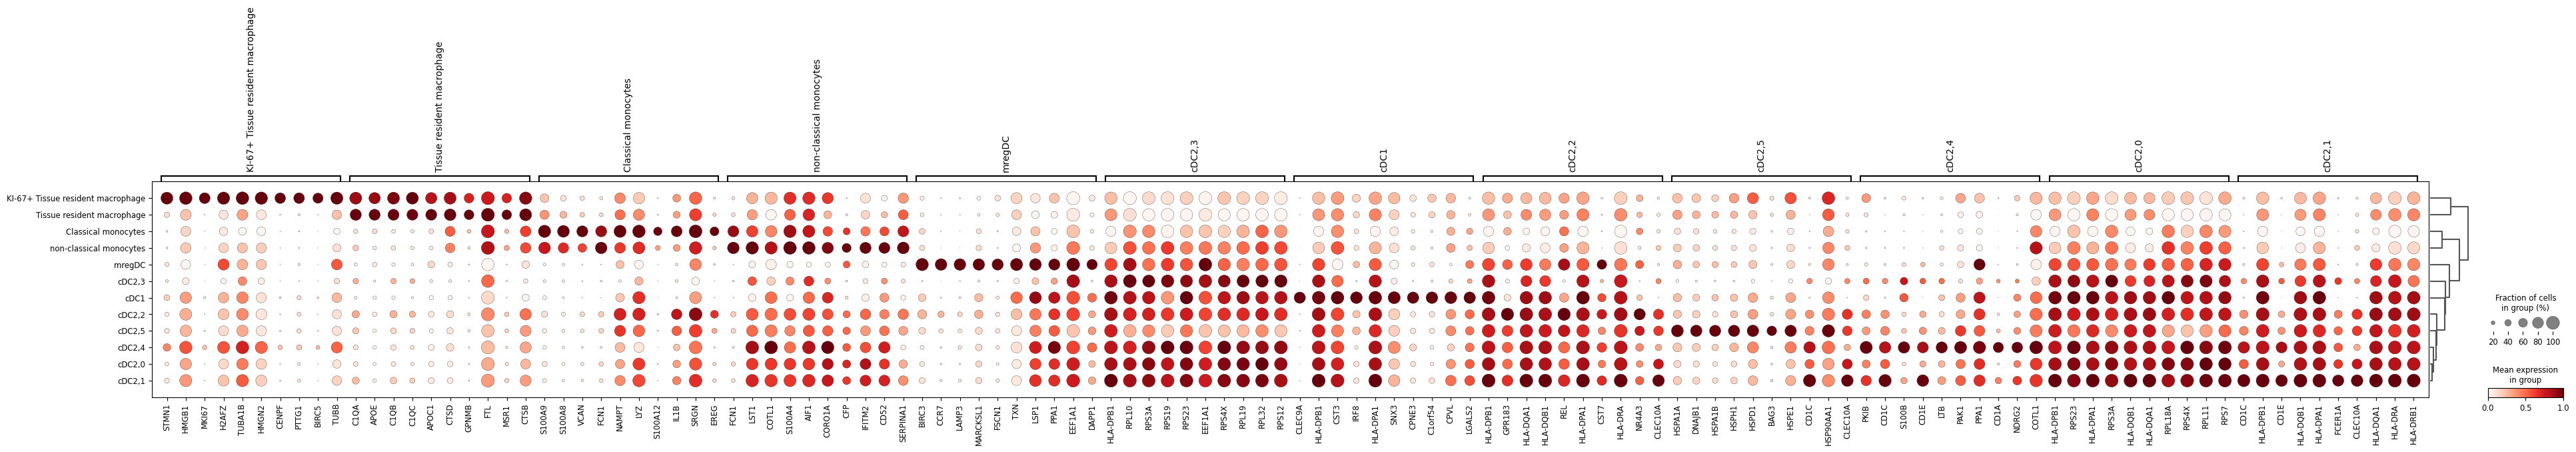

In [17]:
#visualise the top 20 DEG genes for each cluster
sc.pl.rank_genes_groups_dotplot(
    data, groupby="2025_DC2_subcluster_2", standard_scale="var", n_genes=10, min_logfoldchange=1
)